In [2]:
from infsynth import *
import librosa.display
import matplotlib.pyplot as plt

In [5]:
# sd.default.device = 'system'
fs = 44100

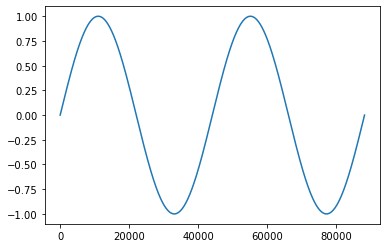

In [4]:
plot(sin(1), 2)

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred


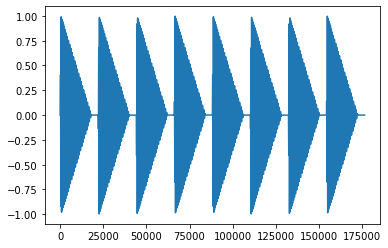

In [5]:

env1 = concat(
    [ad(0.01, 0.1, attack_curv=0.5), dc(0)],
    [0.11, 0.39],) * 50 + 60
env2 = concat(
    [ad(0.01, 0.4, attack_curv=0.5), dc(0)],
    [0.41, 0.09],) 
o = sin(env1) * env2
plot(o, 4)
play(o, 10)

In [17]:
from librosa import load
guitar, fs = load('./infsynth/assets/hit1.wav') 
o = sampler(guitar, fs, 0.5)
play(norm(o), 10)

ValueError: A value in x_new is above the interpolation range.

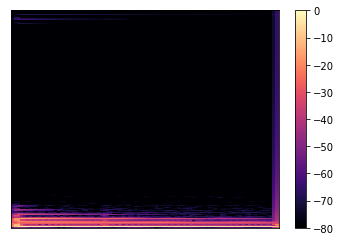

In [7]:
D = librosa.stft(o(np.arange(0, 1, 1/44100)))  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

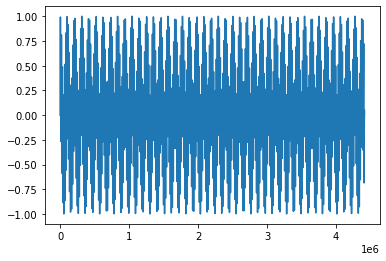

In [85]:
m = sin(np.pi) * sinm(np.e)
plot(m, 100)

In [21]:
o = sin(m*5 + 440)
play(o, 5)

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred


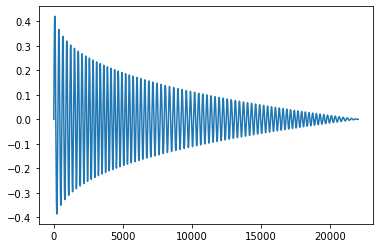

In [90]:
env = adsr(attack_time=0, decay_time=0, sustain_time=0, release_time=0.5)
o = sin(m * 20 + 150)
play(o * env, 10)
plot(o * env, 0.5)


In [74]:
o = (sin(440) + (squ(440)<<0.01))*adsr()
play(basic_flanger(o, 10), 2)

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun o

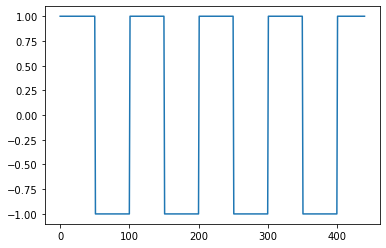

In [51]:
plot(squ(440), 0.01)

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun o

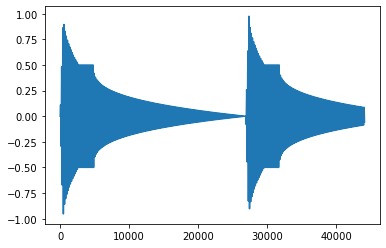

In [5]:
env = adsr()
f = float(librosa.note_to_hz('C4'))
a = sin(f) * env
# b = saw(librosa.note_to_hz('D#4')) * adsr
# c = squ(librosa.note_to_hz('G4')) * adsr
# d = sin(librosa.note_to_hz('B4')) * adsr


# o = concat([a, b, c, d], [0.2, 0.2, 0.2, 0.2])
play(a, 4)
plot(a, 1)

In [4]:
type(f)

numpy.float64

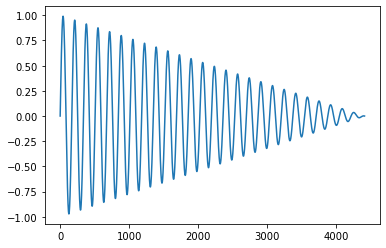

In [15]:
plot(o, 0.1)

In [8]:
a = Square(440)
adsr = ADSR()
m = SinMod(1)
o = a * adsr
play(o, 2)

In [9]:
plot(m1, 10)

NameError: name 'm1' is not defined

In [34]:
S = sin
a1 = S(int(librosa.note_to_hz('C4')))
a2 = S(int(librosa.note_to_hz('E4')))
a3 = S(int(librosa.note_to_hz('G4')))
# a4 = S(librosa.note_to_hz('C4'))
m1 = sawm(7)
m2 = sawm(3)
# m3 = SawMod(5/4)

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun o

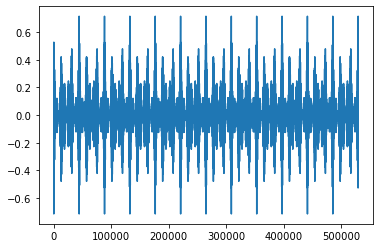

In [38]:
o = (a1 + a2 + a3) *m1 * m2 * dc(1/4)
plot(o<<0.5, t=12)
play(o, t=12)

# o1 = (a1 + a2 + a3 + a4) *m1 * m2 * DC(1)
# play(o, t=3)

In [31]:
a = Sin(440)
b = Sin(440)

In [32]:
o = a.conv(b) * DC(1/15000)

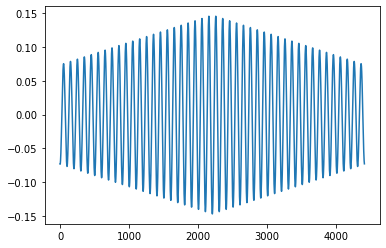

In [34]:
plot(o, t=0.1)
# play(o)

In [18]:
import numpy as np

In [31]:
x = np.array([-1234, 234, 34123])
np.piecewise(
    x,
    [x<0, (x<123512352) & (x>-12341)],
    [1, 0]
)

array([0, 0, 0])

In [4]:
x = np.array([1, 2, 3])
np.stack([x, x]).shape

(2, 3)

In [31]:
from sympy import *

In [33]:
x, y = symbols('x y')
expr = exp(x)*sin(x) + exp(x)*cos(x)

In [34]:
i_expr = integrate(expr, x)

In [45]:
i_expr.evalf(subs={x:19})

26750429.2425858

In [23]:
np.concatenate

<function numpy.concatenate>

In [26]:
inf.sin(44)

NameError: name 'inf' is not defined

In [28]:
op.concat

<function infsynth.signal.op.OP.<locals>.wrapper(*args, **kwargs)>

In [29]:
np.array

<function numpy.array>

In [30]:
np.array([1, 2, 3]).astype

AttributeError: module 'numpy' has no attribute 'astype'

In [31]:
a = lambda x:x

In [32]:
np.array

<function __main__.<lambda>(x)>

In [49]:
scipy.signal.chri

<module 'scipy' from '/home/gyk/anaconda3/envs/synth/lib/python3.8/site-packages/scipy/__init__.py'>

In [16]:
object.__div__

AttributeError: type object 'object' has no attribute '__div__'

In [204]:
arr1 = np.random.rand(100000000)
arr2 = np.repeat(np.pi, 100000000)

In [9]:
import math

In [10]:
math.log2(0.5)

-1.0